<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/05_ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Regression

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

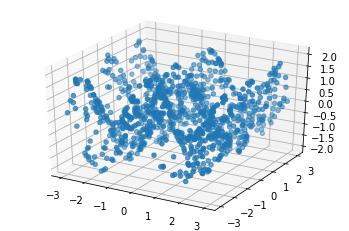

In [ ]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
plt.show()

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9449
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9145
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9154
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8936
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8636
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8021
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7634
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7109
Epoch 9/100
32/32 [==============================] - 0s 996us/step - loss: 0.6418
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6556
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6266
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5881
Epoch 13/100
32/32 [===============

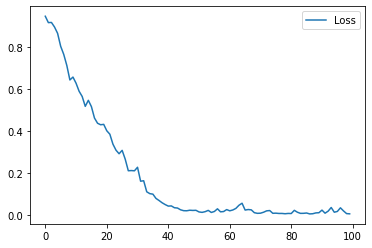

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mse')

r = model.fit(X, y, epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

## Plot the prediction surface

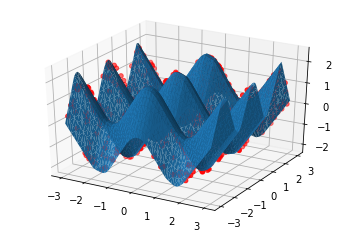

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='red')

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], y_hat, linewidth=0.2, antialiased=True)
plt.show()

## See if the neural network can extrapolate

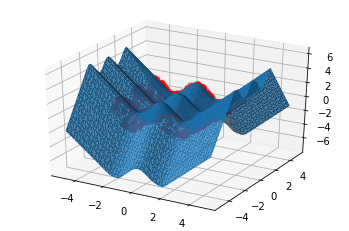

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='red')

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], y_hat, linewidth=0.2, antialiased=True)
plt.show()